In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

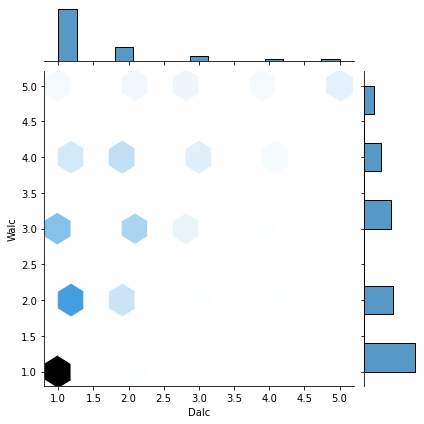

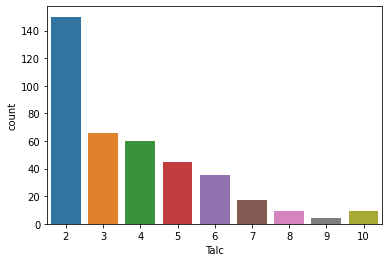

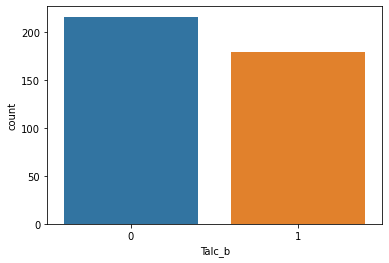

,school,sex,age,address,studytime,failures,famrel,health,absences,G3,Talc_b
0,GP,F,18,U,2,0,4,3,6,6,0
1,GP,F,17,U,2,0,5,3,4,6,0
2,GP,F,15,U,2,3,4,3,10,10,1
3,GP,F,15,U,3,0,3,5,2,15,0
4,GP,F,16,U,2,0,4,5,4,10,0
...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,2,2,5,4,11,9,1
391,MS,M,17,U,1,0,2,2,3,16,1
392,MS,M,21,R,1,3,5,3,3,7,1
393,MS,M,18,R,1,0,4,5,0,10,1


In [6]:
#import data
df = pd.read_csv("Maths.csv")
pd.set_option("display.max.columns",None)
df = df[['school','sex','age','address','studytime','failures','famrel','Dalc','Walc','health','absences','G3']]

#people always drink the same amount or more in weekend,no one drink less
sns.jointplot(x=df['Dalc'], y=df['Walc'], kind='hex')
plt.show()

df['Talc']=df['Dalc']+df['Walc']


def categorise(row):  
    if row['Talc'] > 0 and row['Talc'] < 4:
        return 0
    else:
        return 1
df['Talc_b'] = df.apply(lambda row: categorise(row), axis=1)
sns.countplot(data=df, x='Talc')
plt.show()
df = df.drop(['Walc','Dalc','Talc'], axis=1)
sns.countplot(data=df, x='Talc_b')
plt.show()
df

In [45]:
#check missing value
#no outlier because categiral variables
df.isnull().sum()

school       0
sex          0
age          0
address      0
studytime    0
failures     0
famrel       0
health       0
absences     0
G3           0
Talc_b       0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   school     395 non-null    object
 1   sex        395 non-null    object
 2   age        395 non-null    int64 
 3   address    395 non-null    object
 4   studytime  395 non-null    int64 
 5   failures   395 non-null    int64 
 6   famrel     395 non-null    int64 
 7   health     395 non-null    int64 
 8   absences   395 non-null    int64 
 9   G3         395 non-null    int64 
 10  Talc_b     395 non-null    int64 
dtypes: int64(8), object(3)
memory usage: 34.1+ KB


In [47]:
df.describe()

,age,studytime,failures,famrel,health,absences,G3,Talc_b
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.035443,0.334177,3.944304,3.554430,5.708861,10.415190,0.453165
std,1.276043,0.839240,0.743651,0.896659,1.390303,8.003096,4.581443,0.498433
min,15.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,16.000000,1.000000,0.000000,4.000000,3.000000,0.000000,8.000000,0.000000
50%,17.000000,2.000000,0.000000,4.000000,4.000000,4.000000,11.000000,0.000000
75%,18.000000,2.000000,0.000000,5.000000,5.000000,8.000000,14.000000,1.000000
max,22.000000,4.000000,3.000000,5.000000,5.000000,75.000000,20.000000,1.000000


<AxesSubplot:xlabel='G3', ylabel='count'>

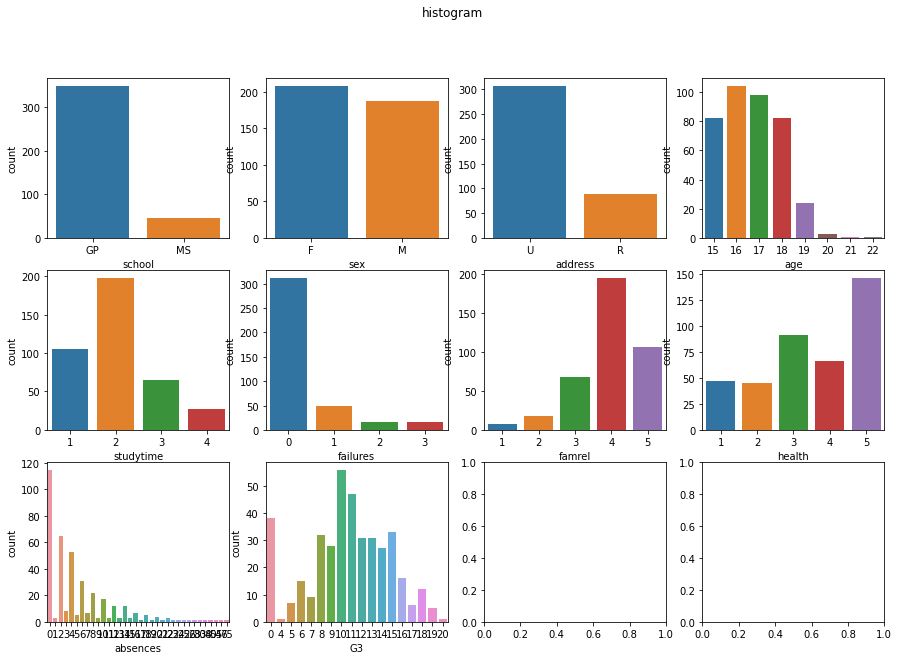

In [48]:
#histograms
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle('histogram')
sns.countplot(ax=axes[0, 0], data=df, x='school')
sns.countplot(ax=axes[0, 1], data=df, x='sex')
sns.countplot(ax=axes[0, 2], data=df, x='address')
sns.countplot(ax=axes[0, 3], data=df, x='age')
sns.countplot(ax=axes[1, 0], data=df, x='studytime')
sns.countplot(ax=axes[1, 1], data=df, x='failures')
sns.countplot(ax=axes[1, 2], data=df, x='famrel')
sns.countplot(ax=axes[1, 3], data=df, x='health')
sns.countplot(ax=axes[2, 0], data=df, x='absences')
sns.countplot(ax=axes[2, 1], data=df, x='G3')

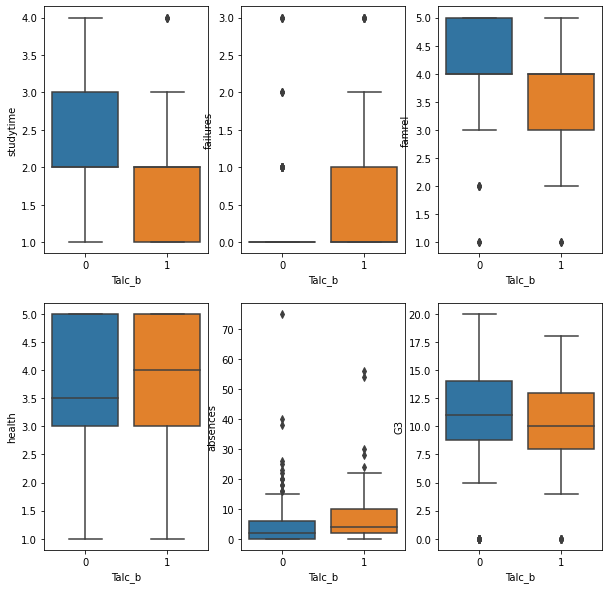

In [56]:
#boxplot for numerical variable 
fig, axs = plt.subplots(2, 3, figsize=(10, 10))


sns.boxplot(data=df, y="studytime", x="Talc_b", ax=axs[0, 0])
sns.boxplot(data=df, y="failures", x="Talc_b", ax=axs[0, 1])
sns.boxplot(data=df, y="famrel", x="Talc_b", ax=axs[0, 2])
sns.boxplot(data=df, y="health", x="Talc_b", ax=axs[1, 0])
sns.boxplot(data=df, y="absences", x="Talc_b", ax=axs[1, 1])
sns.boxplot(data=df, y="G3", x="Talc_b", ax=axs[1, 2])

plt.show()

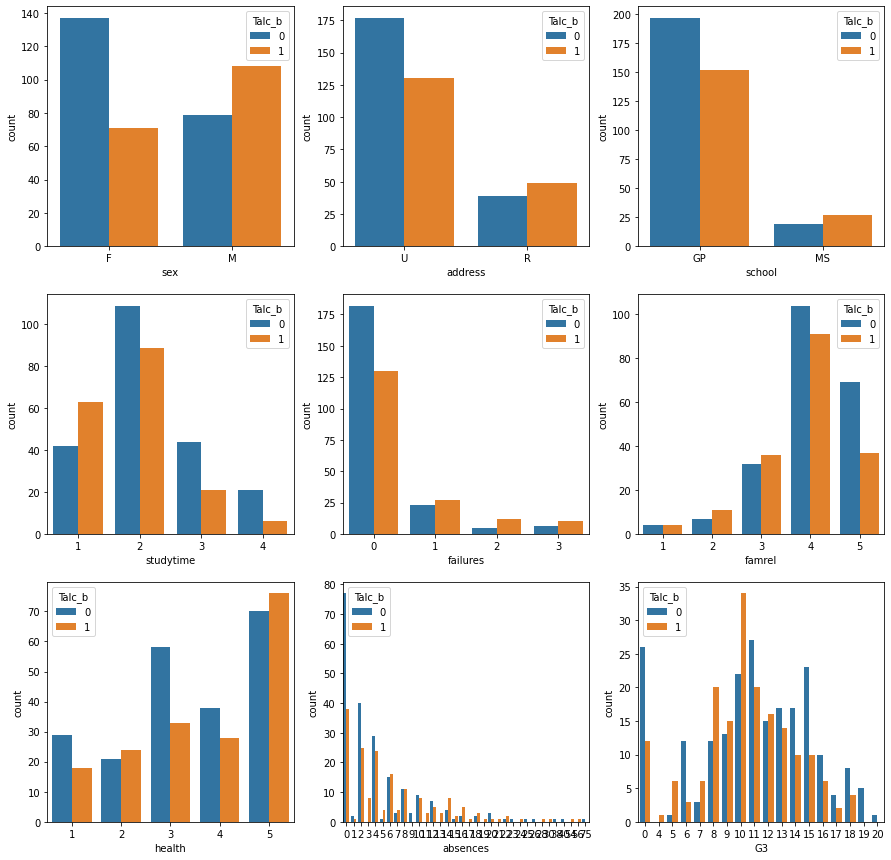

In [57]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

sns.countplot(data=df, x="sex", hue="Talc_b", ax=axs[0, 0])
sns.countplot(data=df, x="address", hue="Talc_b", ax=axs[0, 1])
sns.countplot(data=df, x="school", hue="Talc_b", ax=axs[0, 2])
sns.countplot(data=df, x="studytime", hue="Talc_b", ax=axs[1, 0])
sns.countplot(data=df, x="failures", hue="Talc_b", ax=axs[1, 1])
sns.countplot(data=df, x="famrel", hue="Talc_b", ax=axs[1, 2])
sns.countplot(data=df, x="health", hue="Talc_b", ax=axs[2, 0])
sns.countplot(data=df, x="absences", hue="Talc_b", ax=axs[2, 1])
sns.countplot(data=df, x="G3", hue="Talc_b", ax=axs[2, 2])

plt.show()

In [7]:
#data processing
df1=df
sex=["F", "M"]
dummy_vars=[0,1]
df1['sex_dummy'] = df1['sex'].replace(sex, dummy_vars)

address=["U", "R"]
df1['address_dummy'] = df1['address'].replace(address, dummy_vars)

school=["GP", "MS"]
df1['school_dummy'] = df1['school'].replace(school, dummy_vars)


df1 = df.drop(['sex','address','school'], axis=1)
df1

,age,studytime,failures,famrel,health,absences,G3,Talc_b,sex_dummy,address_dummy,school_dummy
0,18,2,0,4,3,6,6,0,0,0,0
1,17,2,0,5,3,4,6,0,0,0,0
2,15,2,3,4,3,10,10,1,0,0,0
3,15,3,0,3,5,2,15,0,0,0,0
4,16,2,0,4,5,4,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,5,4,11,9,1,1,0,1
391,17,1,0,2,2,3,16,1,1,0,1
392,21,1,3,5,3,3,7,1,1,1,1
393,18,1,0,4,5,0,10,1,1,1,1


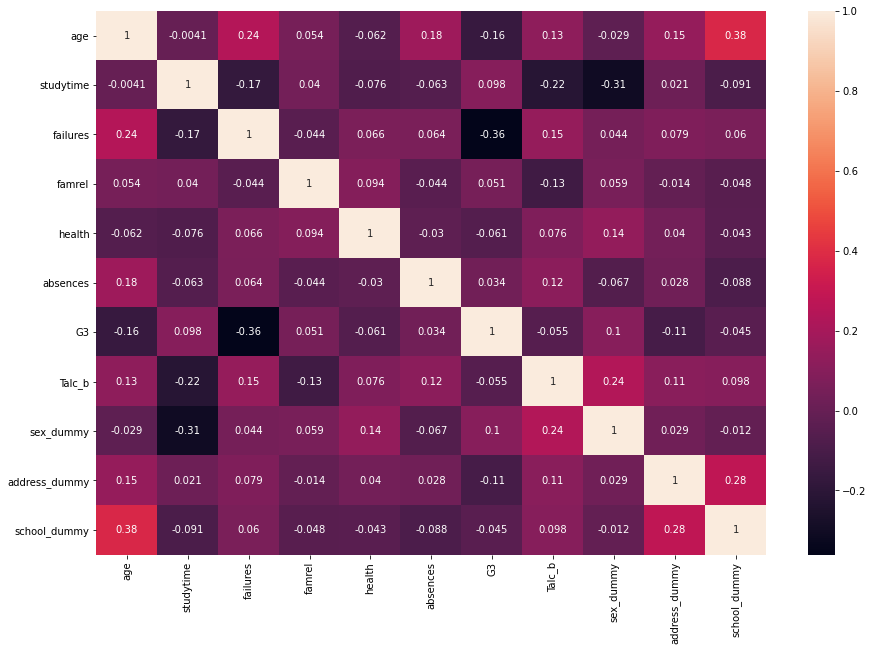

In [60]:
#optional
#catogrial correlation 看不出来 
plt.figure(figsize=(15, 10))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [176]:
#classfication
np.random.seed(0)
X = df1.drop(['Talc_b'], axis=1)
y = df1['Talc_b']
#test,train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

Accuracy: 0.6638655462184874
recall: 0.4222222222222222
precision: 0.5757575757575758


<AxesSubplot:>

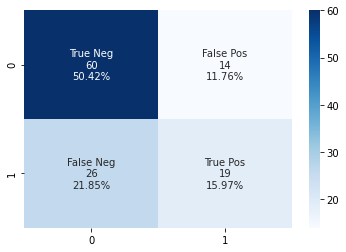

In [177]:
#
tree_clf = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state = 0)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("recall:",metrics.recall_score(y_test, y_pred))
print("precision:",metrics.precision_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


[Text(0.52, 0.9, 'sex_dummy <= 0.5\nentropy = 0.999\nsamples = 276\nvalue = [142, 134]\nclass = 0'),
 Text(0.26, 0.7, 'failures <= 1.5\nentropy = 0.932\nsamples = 141\nvalue = [92, 49]\nclass = 0'),
 Text(0.16, 0.5, 'G3 <= 8.5\nentropy = 0.905\nsamples = 128\nvalue = [87, 41]\nclass = 0'),
 Text(0.08, 0.3, 'age <= 16.5\nentropy = 0.663\nsamples = 29\nvalue = [24, 5]\nclass = 0'),
 Text(0.04, 0.1, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = 0'),
 Text(0.12, 0.1, 'entropy = 0.811\nsamples = 20\nvalue = [15, 5]\nclass = 0'),
 Text(0.24, 0.3, 'famrel <= 1.5\nentropy = 0.946\nsamples = 99\nvalue = [63, 36]\nclass = 0'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0'),
 Text(0.28, 0.1, 'entropy = 0.954\nsamples = 96\nvalue = [60, 36]\nclass = 0'),
 Text(0.36, 0.5, 'age <= 15.5\nentropy = 0.961\nsamples = 13\nvalue = [5, 8]\nclass = 1'),
 Text(0.32, 0.3, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = 1'),
 Text(0.4, 0.3, 'absences <= 5.0\nentropy = 0.95

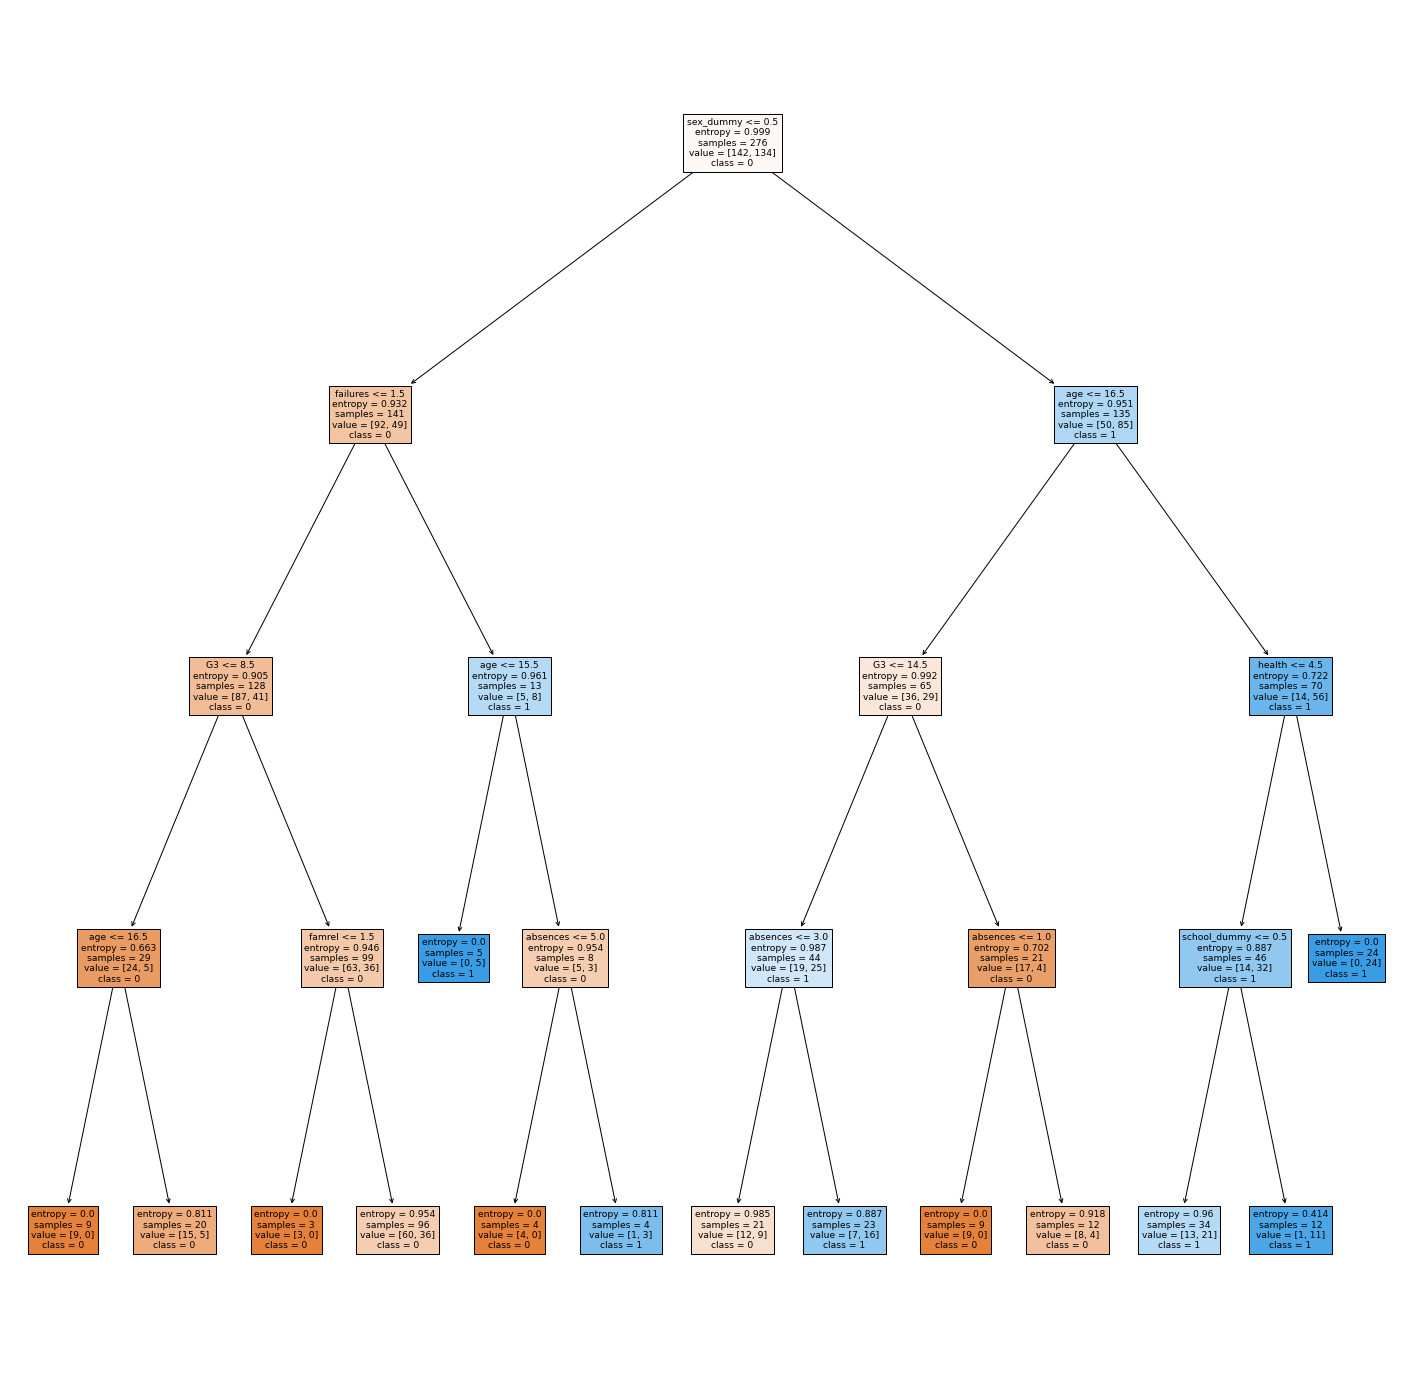

In [178]:
feature=['age','studytime','failures','famrel','health','absences','G3','sex_dummy','address_dummy','school_dummy']
fig, ax = plt.subplots(figsize=(25,25))
tree.plot_tree(tree_clf, feature_names = feature,class_names=['0','1'], filled=True)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy: 0.6554621848739496
Precision: 0.5434782608695652
Recall: 0.5555555555555556


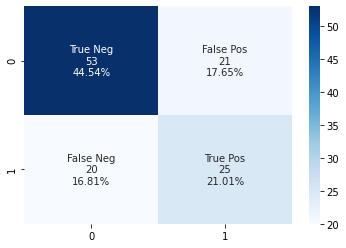

In [180]:
#logistic regerssion
logreg=LogisticRegression(random_state=0).fit(X_train, y_train)
logreg.fit(X_train,y_train) 
y_pred=logreg.predict(X_test) 
cm = metrics.confusion_matrix(y_test, y_pred) 


cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

print("Precision:",metrics.precision_score(y_test, y_pred)) 

print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6890756302521008
Precision: 0.6052631578947368
Recall: 0.5111111111111111


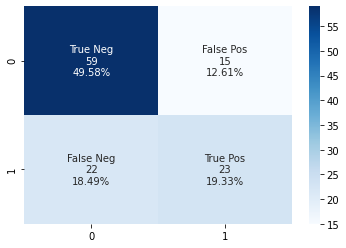

In [181]:
#ranfom forest
#max_depth是经过调试得出的3
rfc=RandomForestClassifier(max_depth=4,random_state=0).fit(X_train, y_train)
rfc.fit(X_train,y_train) 
y_pred=rfc.predict(X_test) 
cm = metrics.confusion_matrix(y_test, y_pred) 


cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

print("Precision:",metrics.precision_score(y_test, y_pred)) 

print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
#加了StandardScaler结果没好反而差了一点。
#如果字数不够可以把process写进report当作改进model的过程。

In [152]:
#classfication
np.random.seed(0)
X = df1.drop(['Talc_b'], axis=1)
y = df1['Talc_b']
#test,train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [153]:
#StandardScaler 
from sklearn.preprocessing import StandardScaler
num_cols = ["age","studytime","failures","famrel","famrel","health","absences","G3"]
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Accuracy: 0.6638655462184874
recall: 0.4222222222222222
precision: 0.5757575757575758


<AxesSubplot:>

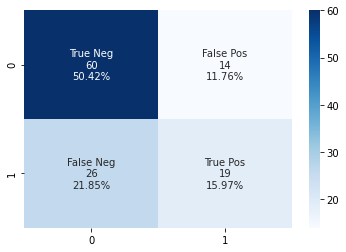

In [154]:
#DecisionTreeClassifier
#max_depth是经过调试得出的4
tree_clf = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state = 0)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("recall:",metrics.recall_score(y_test, y_pred))
print("precision:",metrics.precision_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')



[Text(0.52, 0.9, 'sex_dummy <= 0.5\nentropy = 0.999\nsamples = 276\nvalue = [142, 134]\nclass = 0'),
 Text(0.26, 0.7, 'failures <= 1.676\nentropy = 0.932\nsamples = 141\nvalue = [92, 49]\nclass = 0'),
 Text(0.16, 0.5, 'G3 <= -0.531\nentropy = 0.905\nsamples = 128\nvalue = [87, 41]\nclass = 0'),
 Text(0.08, 0.3, 'age <= -0.151\nentropy = 0.663\nsamples = 29\nvalue = [24, 5]\nclass = 0'),
 Text(0.04, 0.1, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = 0'),
 Text(0.12, 0.1, 'entropy = 0.811\nsamples = 20\nvalue = [15, 5]\nclass = 0'),
 Text(0.24, 0.3, 'famrel <= -2.729\nentropy = 0.946\nsamples = 99\nvalue = [63, 36]\nclass = 0'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0'),
 Text(0.28, 0.1, 'entropy = 0.954\nsamples = 96\nvalue = [60, 36]\nclass = 0'),
 Text(0.36, 0.5, 'age <= -0.926\nentropy = 0.961\nsamples = 13\nvalue = [5, 8]\nclass = 1'),
 Text(0.32, 0.3, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = 1'),
 Text(0.4, 0.3, 'absences <= -0.146\

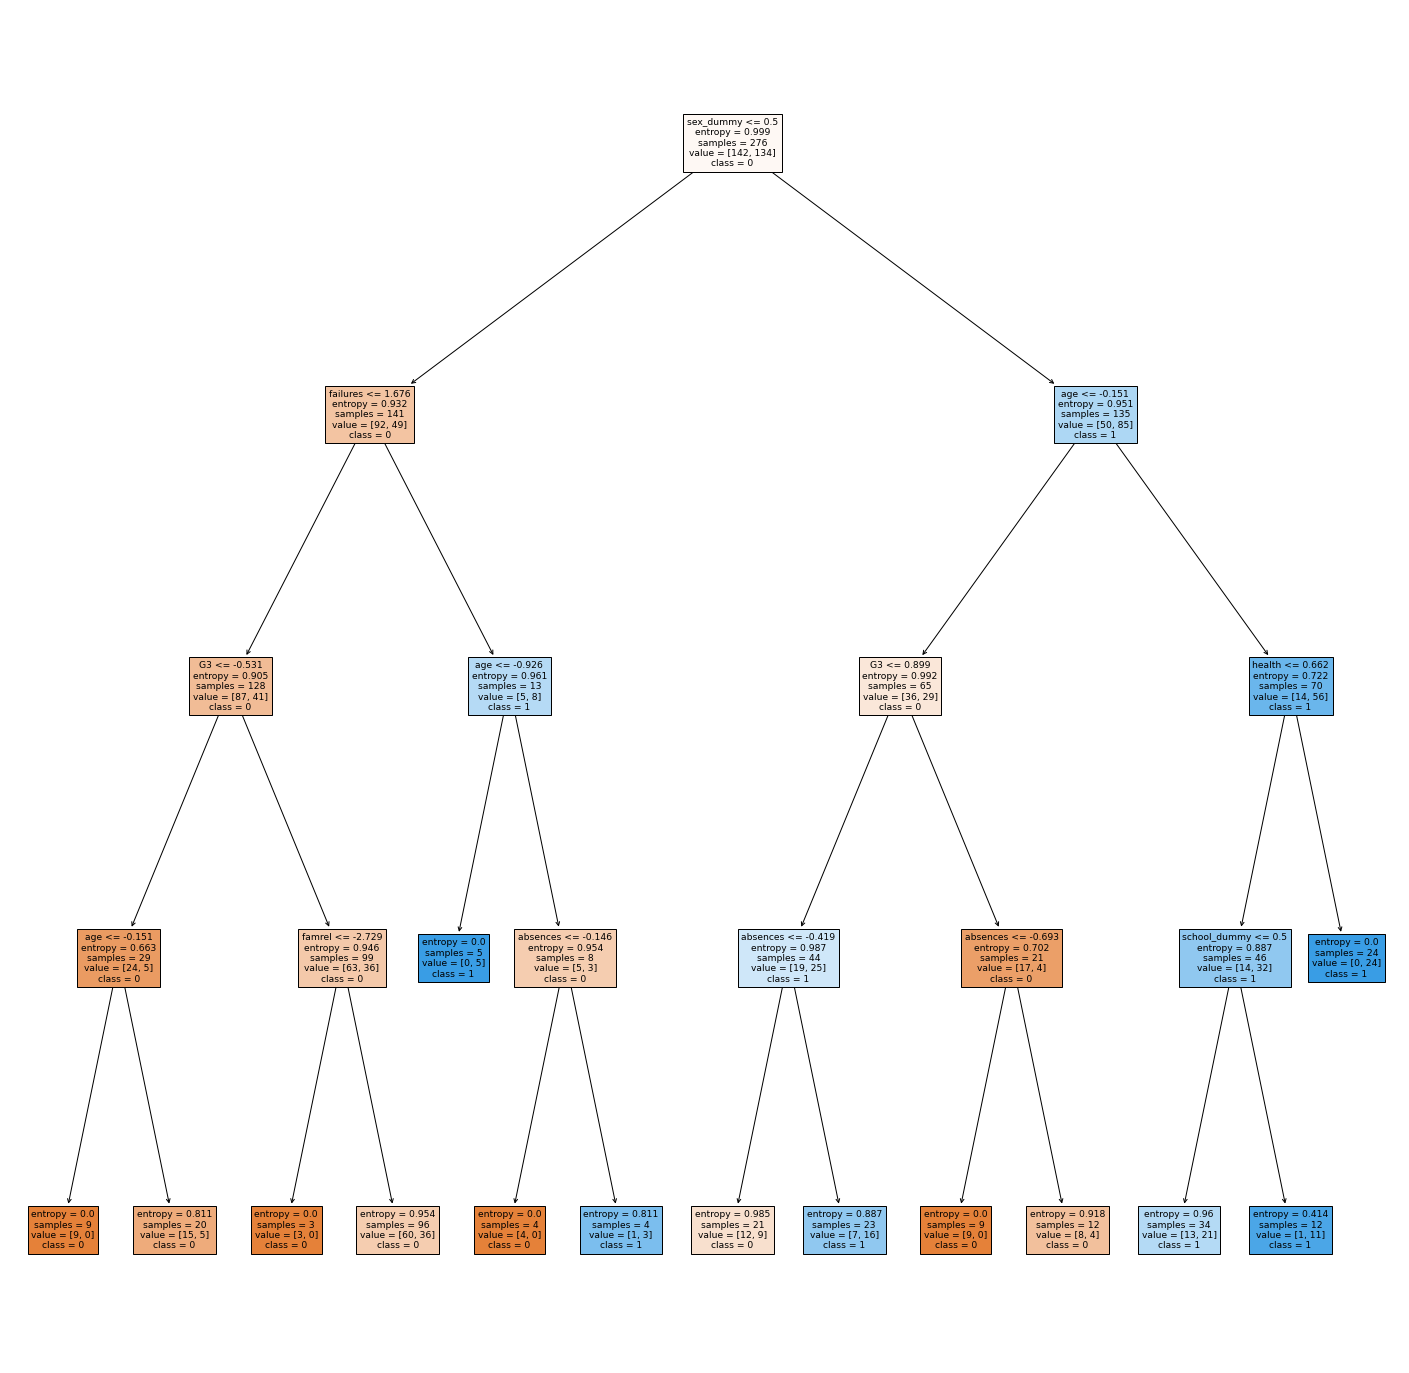

In [155]:
feature=['age','studytime','failures','famrel','health','absences','G3','sex_dummy','address_dummy','school_dummy']
fig, ax = plt.subplots(figsize=(25,25))
tree.plot_tree(tree_clf, feature_names = feature,class_names=['0','1'], filled=True)

Accuracy: 0.6554621848739496
Precision: 0.5434782608695652
Recall: 0.5555555555555556


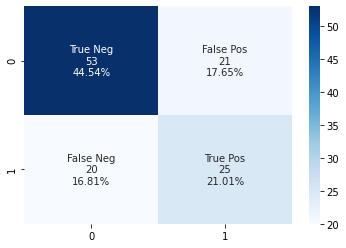

In [160]:
#logistic regerssion
logreg=LogisticRegression(random_state=0).fit(X_train, y_train)
logreg.fit(X_train,y_train) 
y_pred=logreg.predict(X_test) 
cm = metrics.confusion_matrix(y_test, y_pred) 


cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

print("Precision:",metrics.precision_score(y_test, y_pred)) 

print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.680672268907563
Precision: 0.5945945945945946
Recall: 0.4888888888888889


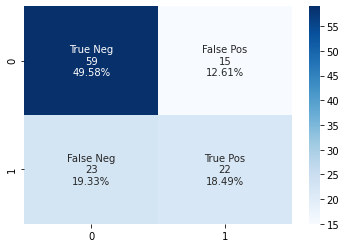

In [167]:
#ranfom forest
#max_depth是经过调试得出的3
rfc=RandomForestClassifier(max_depth=2,random_state=0).fit(X_train, y_train)
rfc.fit(X_train,y_train) 
y_pred=rfc.predict(X_test) 
cm = metrics.confusion_matrix(y_test, y_pred) 


cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')


print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

print("Precision:",metrics.precision_score(y_test, y_pred)) 

print("Recall:",metrics.recall_score(y_test, y_pred))